# Longshot bias in esports gaming

TO DO: Check Longshot bias in esports gaming

### Let's import the packages and data from Excel file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [152]:
df = pd.read_excel("WhichOddWins.xlsx", sheet_name="HA_Bias_2021", skiprows=[0])

### Preparing the data

In [153]:
df = df[["Div", "Date", "OddWins", "STD", "MAX", "MIN", "StakeBig", "WinOnBig", "StakeSmall", "WinOnSmall"]]

In [154]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [155]:
df["ProfitOnBig"] = df["WinOnBig"] - df["StakeBig"]

In [156]:
df["ProfitOnSmall"] = df["WinOnSmall"] - df["StakeSmall"]

In [157]:
df = df.dropna()

In [158]:
# list of thresholds of standard deviation for filtering the data 
thresholds = [0.0, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0]

In [159]:
# Sanity check
df.tail()

,Div,Date,OddWins,STD,MAX,MIN,StakeBig,WinOnBig,StakeSmall,WinOnSmall,Year,ProfitOnBig,ProfitOnSmall
12022,starcraft-2-global-starcraft-ii,2021-04-22,Small,0.700,2.80,1.40,3.888889,0.000000,8.750000,12.250000,2021.0,-3.888889,3.500000
12023,starcraft-2-global-starcraft-ii,2021-04-22,Small,3.750,8.57,1.07,2.830251,0.000000,38.214286,40.889286,2021.0,-2.830251,2.675000
12024,starcraft-2-global-starcraft-ii,2021-04-26,Small,1.080,3.44,1.28,3.524590,0.000000,11.428571,14.628571,2021.0,-3.524590,3.200000
12025,starcraft-2-global-starcraft-ii,2021-04-29,Small,0.435,2.40,1.53,4.285714,0.000000,7.216981,11.041981,2021.0,-4.285714,3.825000
12026,starcraft-2-global-starcraft-ii,2021-05-06,Big,0.015,1.88,1.85,5.340909,10.040909,5.441176,0.000000,2021.0,4.700000,-5.441176


In [160]:
# Sanity check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12019 entries, 0 to 12026
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Div            12019 non-null  object        
 1   Date           12019 non-null  datetime64[ns]
 2   OddWins        12019 non-null  object        
 3   STD            12019 non-null  float64       
 4   MAX            12019 non-null  float64       
 5   MIN            12019 non-null  float64       
 6   StakeBig       12019 non-null  float64       
 7   WinOnBig       12019 non-null  float64       
 8   StakeSmall     12019 non-null  float64       
 9   WinOnSmall     12019 non-null  float64       
 10  Year           12019 non-null  float64       
 11  ProfitOnBig    12019 non-null  float64       
 12  ProfitOnSmall  12019 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.3+ MB


In [161]:
# Sanity check again again
leagues = df["Div"].unique()
leagues = sorted(leagues, key=str.lower)

In [162]:
leagues

['Counter-Strike ESL Pro League',
 'counter-strike-perfect-world-league-season-1',
 'Dota 2 Champions League',
 'Dota 2 ESL',
 'Dota 2 i-League',
 'League of Legends EU Masters',
 'League of Legends European Championship',
 'League of Legends LCK',
 'League of Legends LDL',
 'League of Legends Oceanic Pro League 2020',
 'league-of-legends-cblol',
 'league-of-legends-lcl',
 'league-of-legends-lco',
 'league-of-legends-lcs',
 'league-of-legends-lec',
 'league-of-legends-ljl',
 'league-of-legends-lpl',
 'league-of-legends-mid-season-cup',
 'league-of-legends-tcl',
 'OverWatch APAC Premier',
 'OverWatch OGN Overwatch APEX',
 'OverWatch Overwatch Contenders',
 'OverWatch Pacific Championship',
 'OverWatch Premier Series',
 'OverWatch World Cup',
 'overwatch-overwatch-league',
 'starcraft-2-global-starcraft-ii']

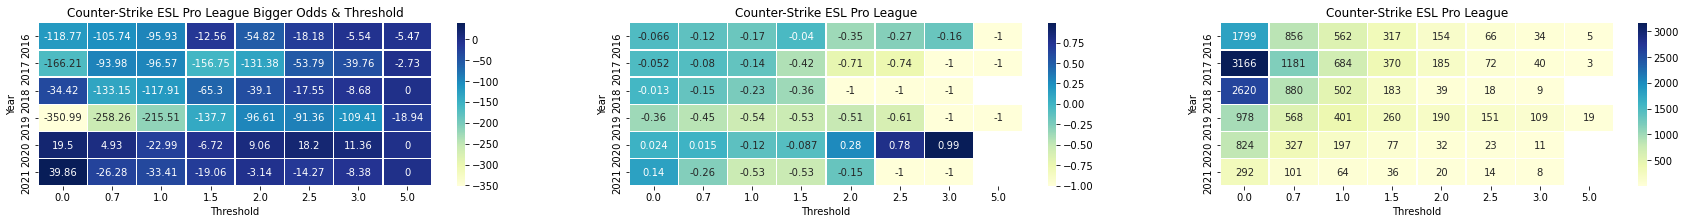

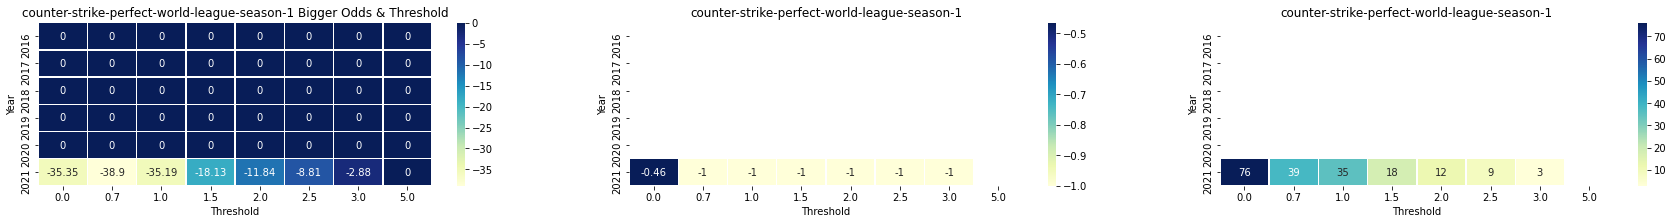

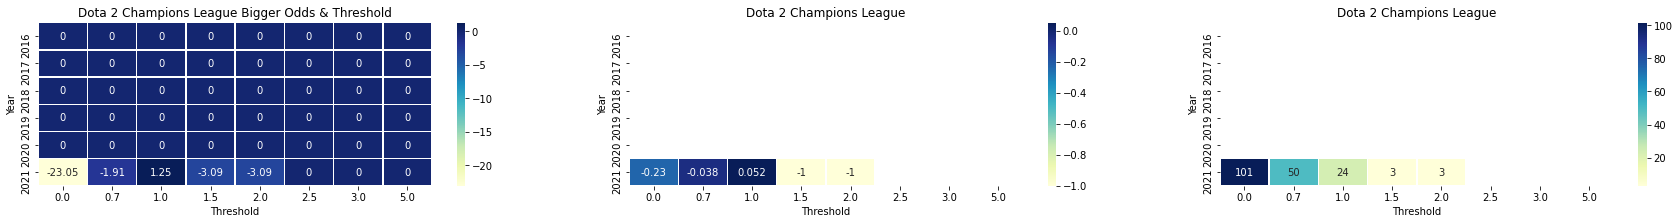

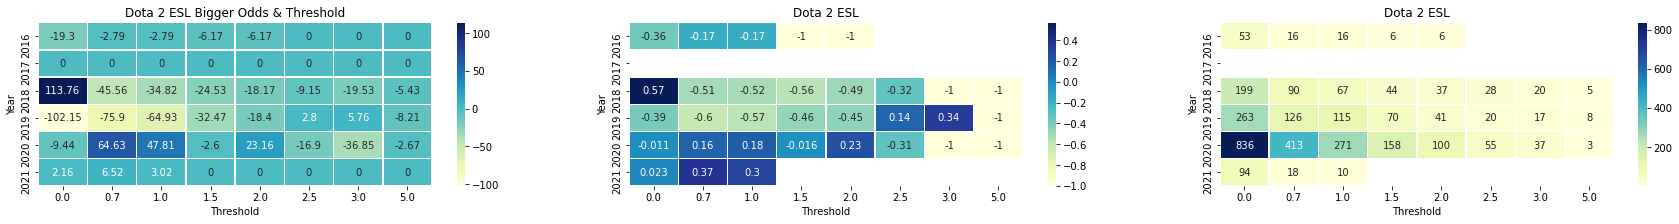

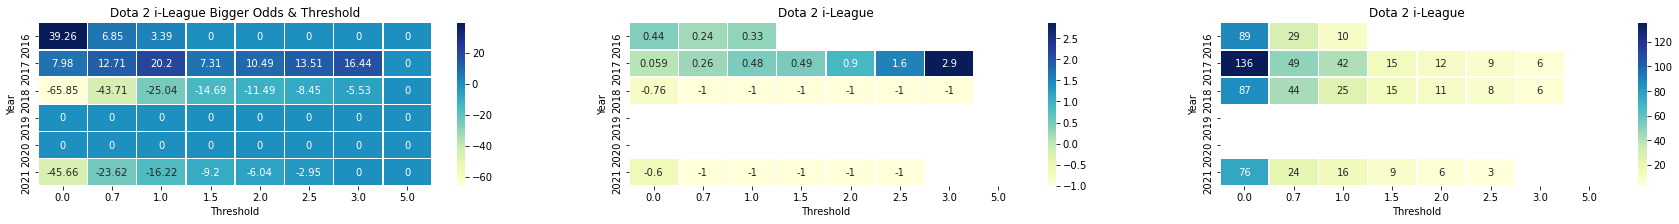

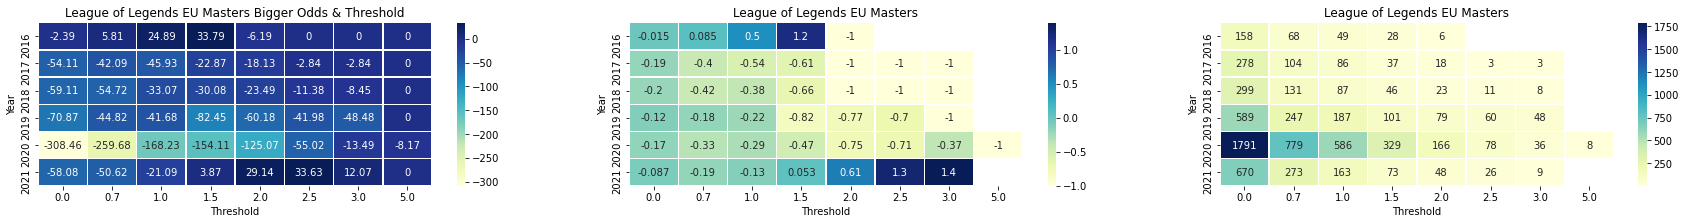

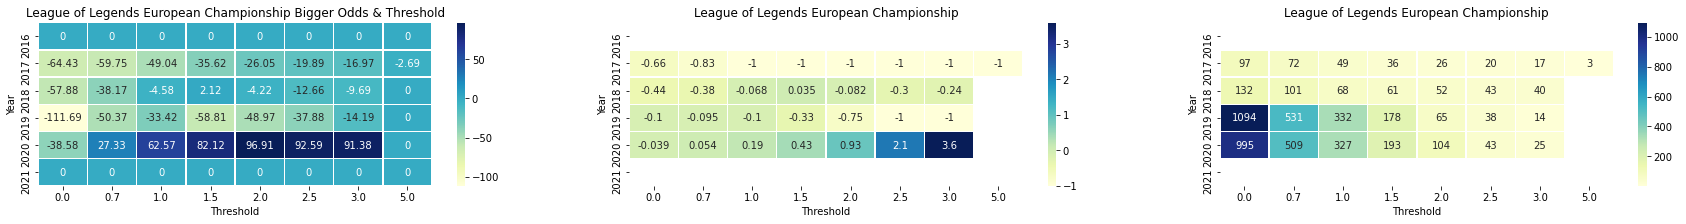

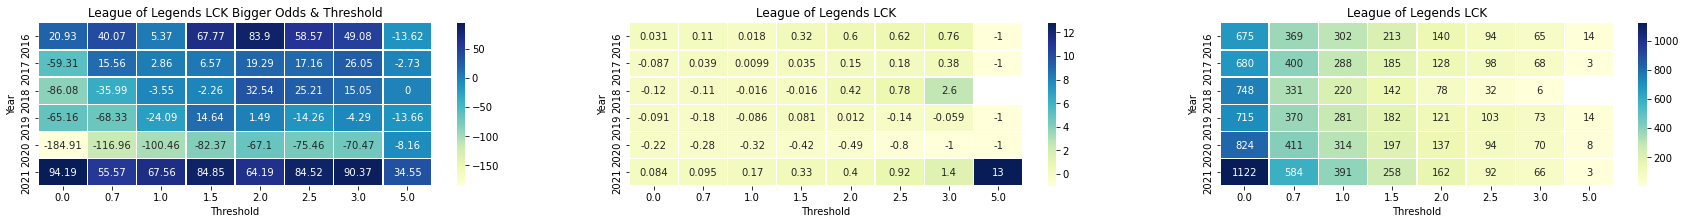

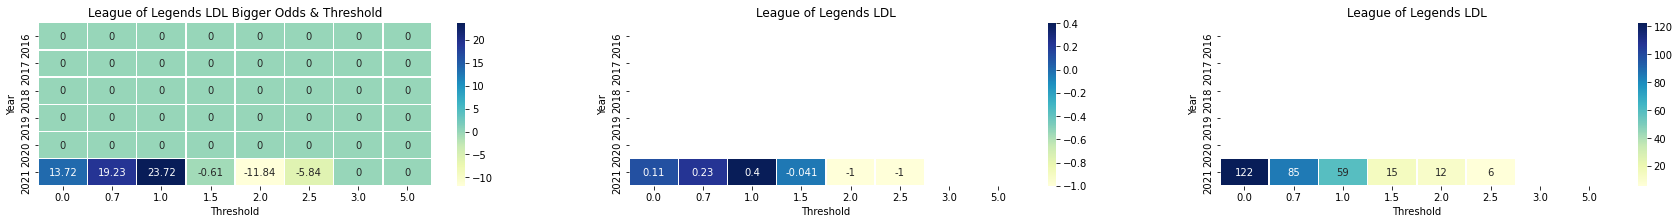

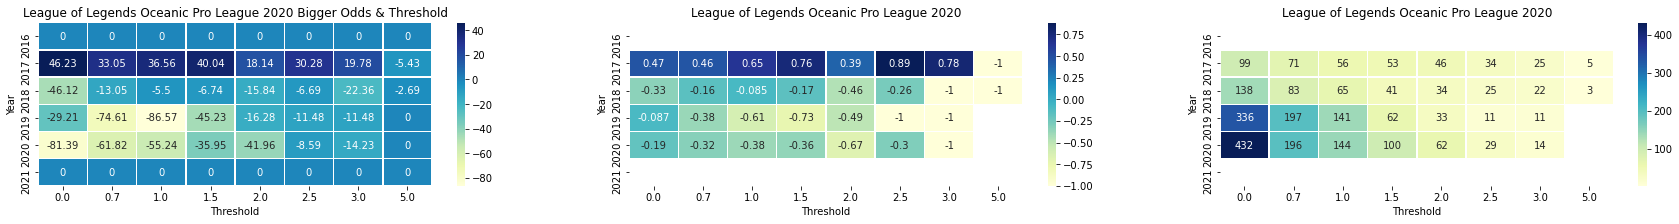

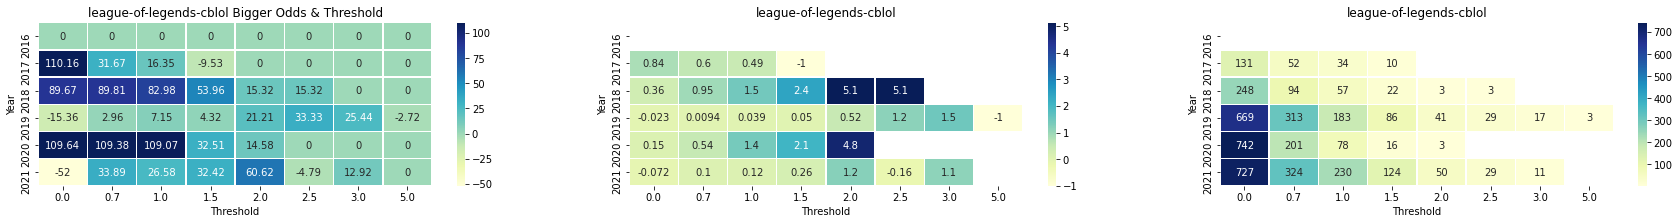

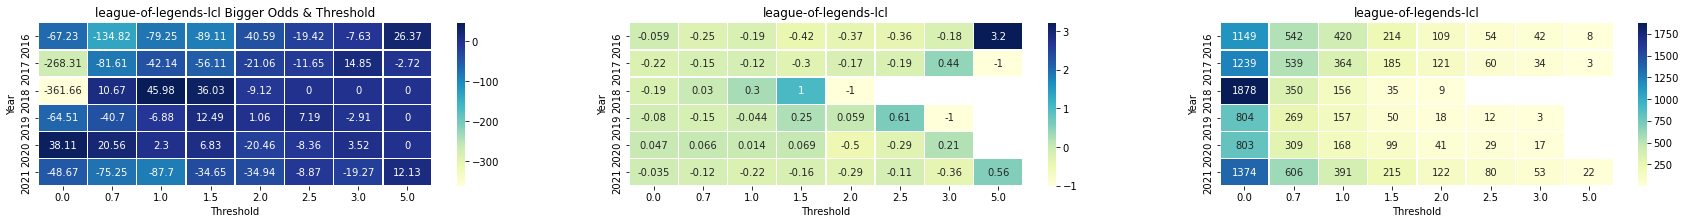

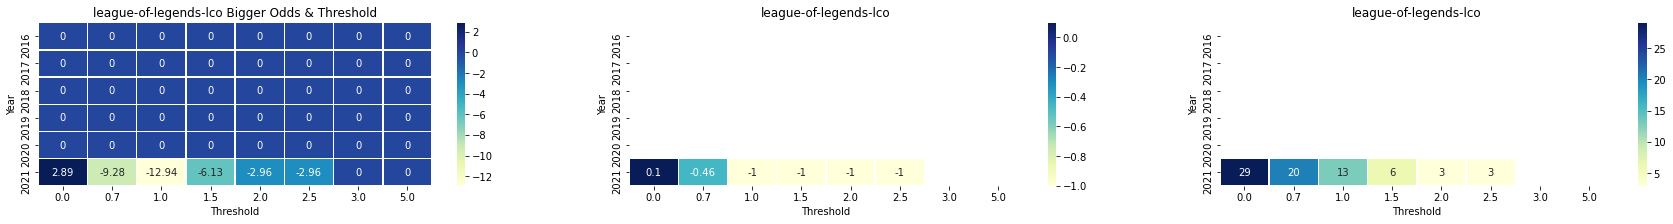

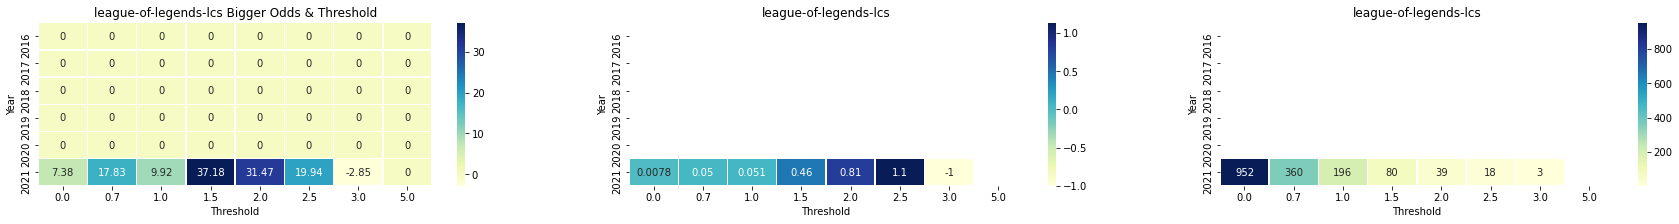

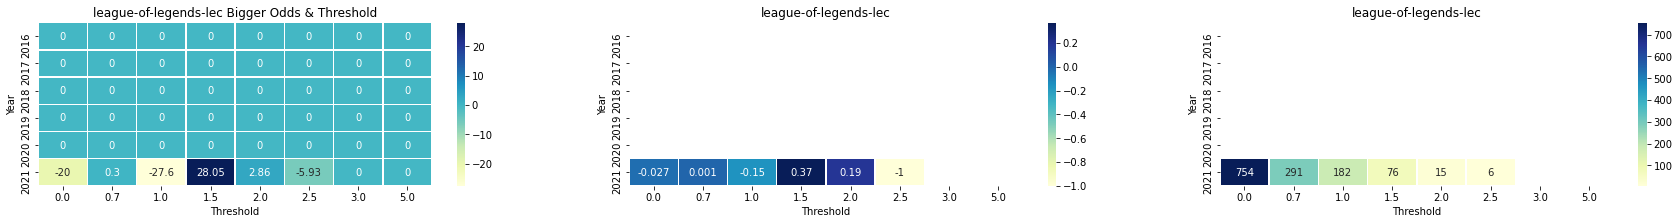

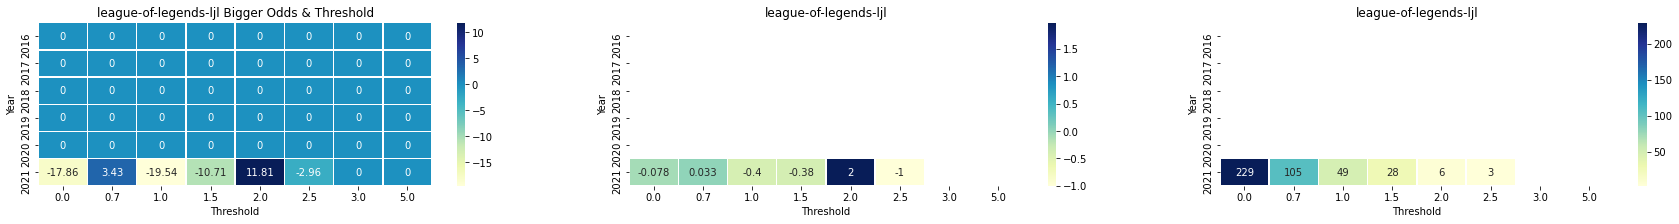

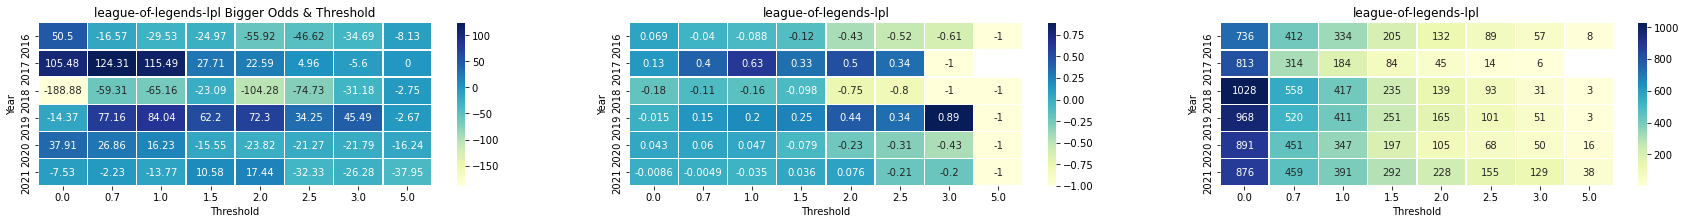

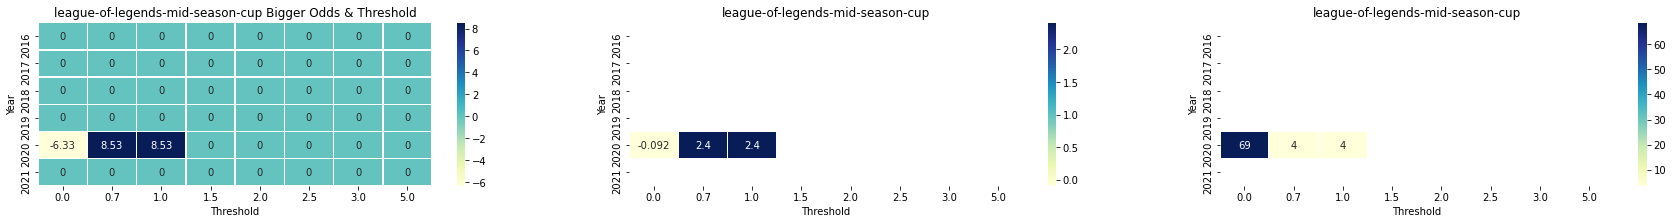

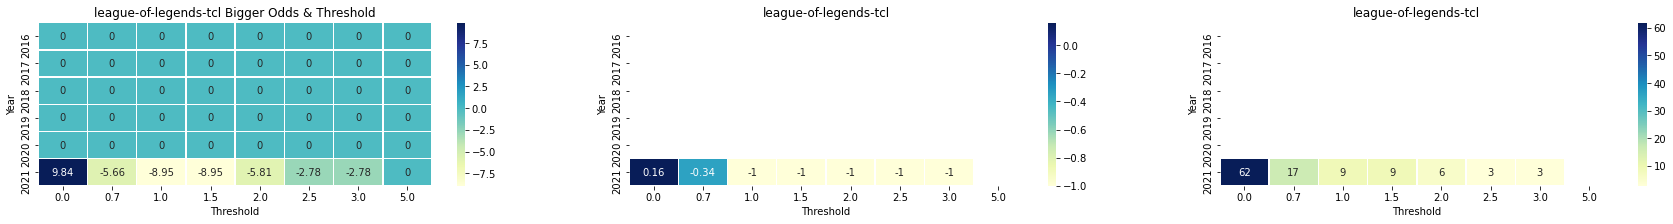

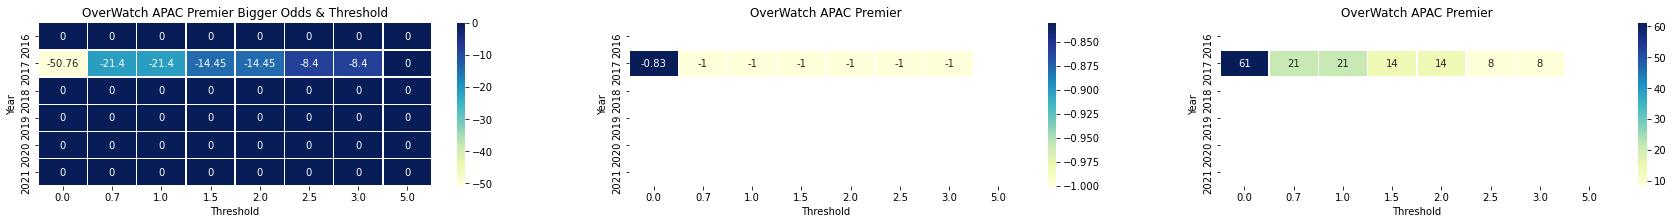

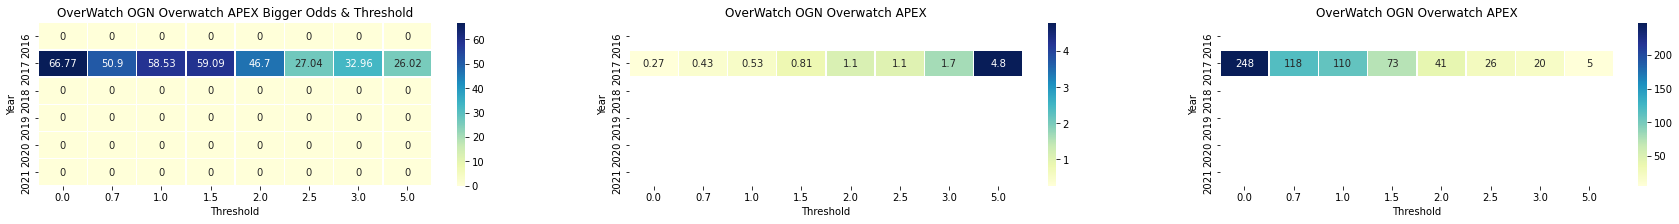

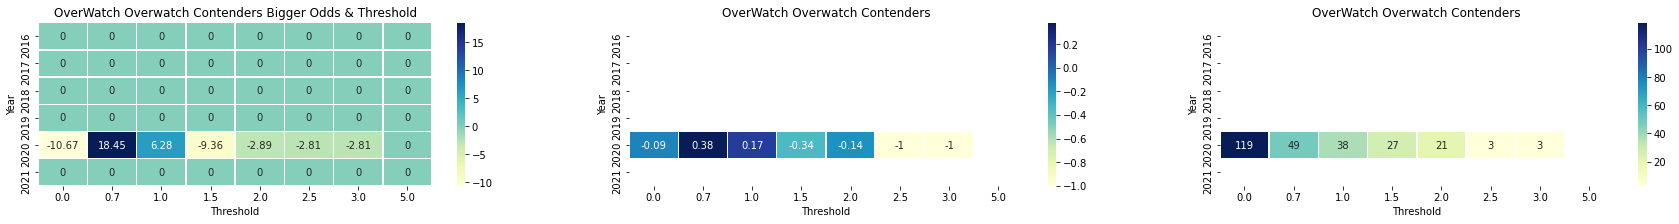

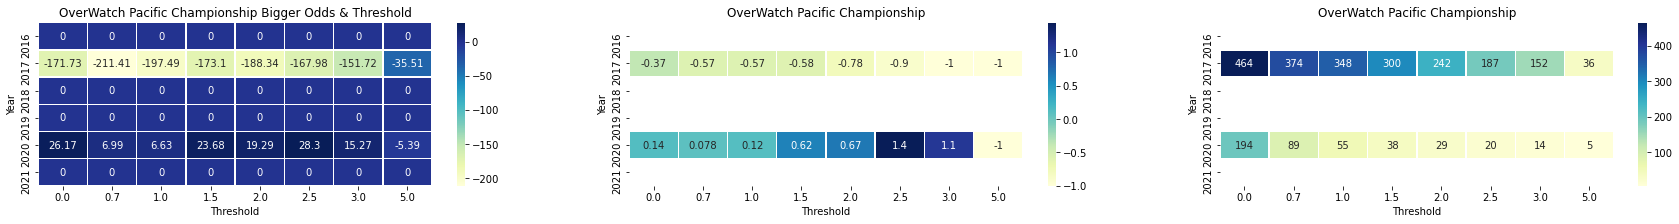

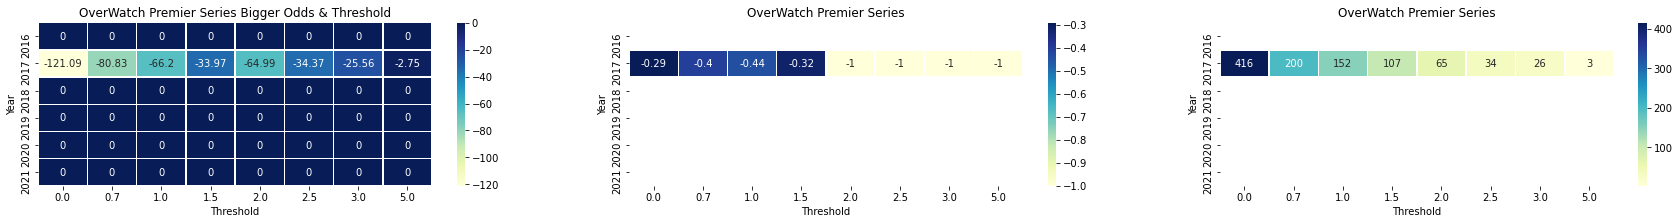

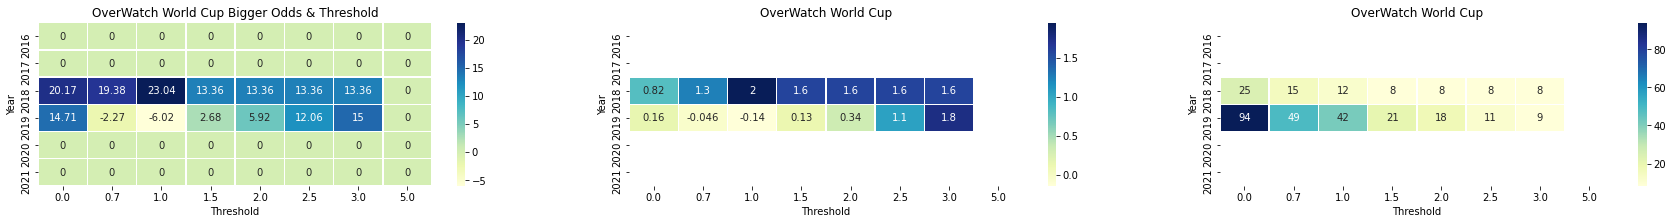

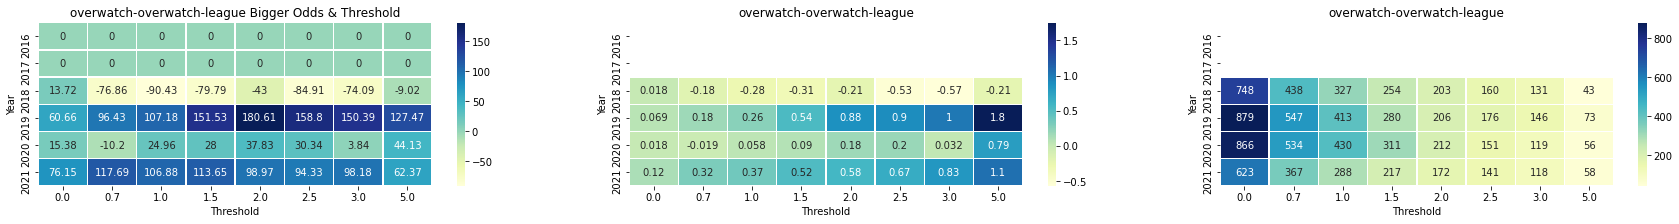

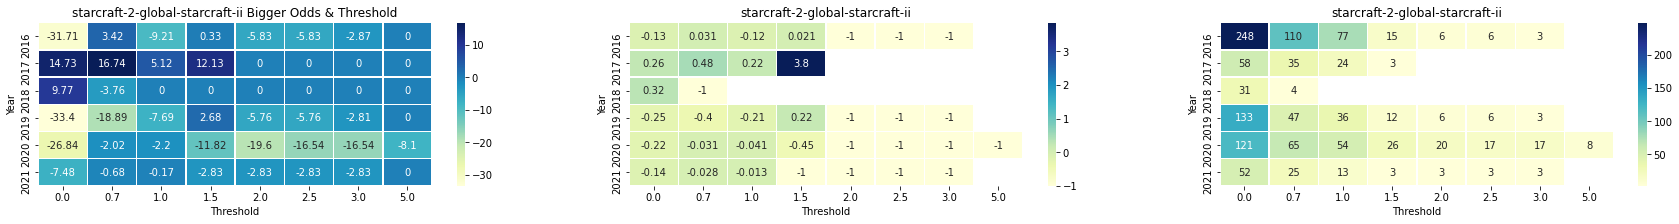

In [163]:
#BiggerOdds & Bigger than threshold:

i = 0
plt.rcParams["figure.figsize"] = (30,3)

for league in leagues:
    df_results = pd.DataFrame(columns=["Year", "Div", "Threshold", "ProfitOnBig", "Profit_pct", "Profit_cnt"])
    i += 1
    for years in range(2016, 2022):
        div = (df["Div"] == league)
        year = (df["Year"] == years)
        i += 1
        for threshold in thresholds:
            std_range = (df["STD"] >= threshold)
            df_filtered = df[year & div & std_range]
            profit = df_filtered["ProfitOnBig"].sum()
            profit_pct = profit / df_filtered["StakeBig"].sum()
            profit_cnt = df_filtered["ProfitOnBig"].sum()/profit_pct
            new_row = pd.Series({"Year":years, "Div":league, "Threshold":threshold, "Profit":round(profit,2), "Profit_pct":profit_pct, "Profit_cnt":profit_cnt})
            df_results = df_results.append(new_row, ignore_index=True)
            i += 1
    fig, ax = plt.subplots(1,3)
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit"), cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5, ax=ax[0]).set(title=str(league) + " Bigger Odds & Threshold")
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit_pct"), cmap="YlGnBu", annot=True, linewidths=0.5, ax=ax[1]).set(title=league)
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit_cnt"), cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, ax=ax[2]).set(title=league)
    fig.show()
    

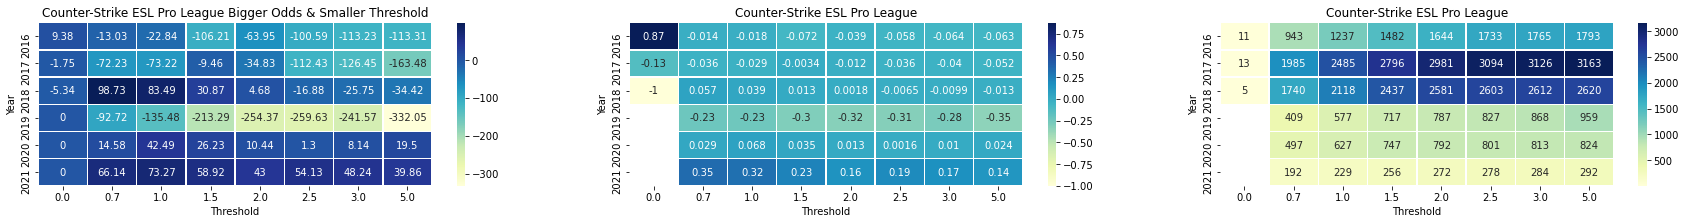

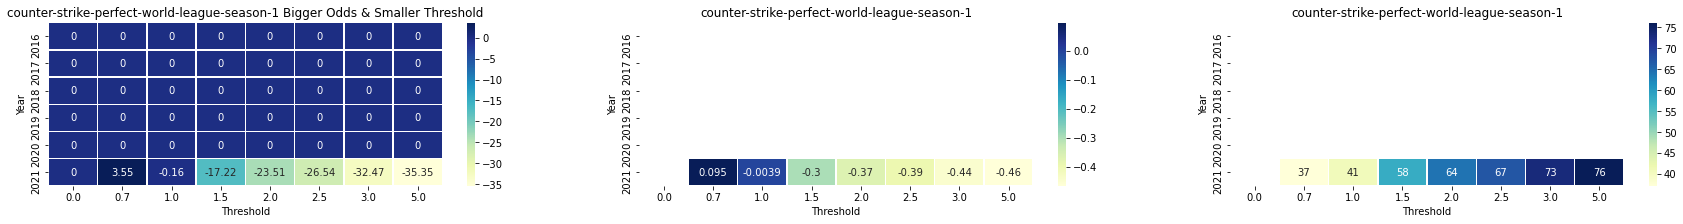

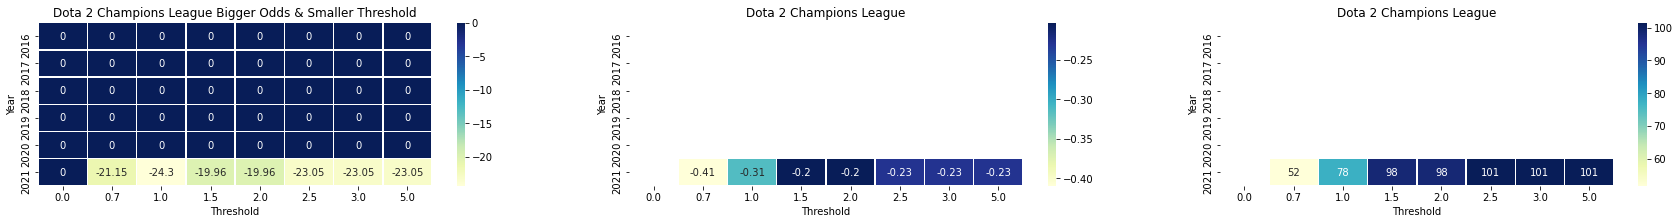

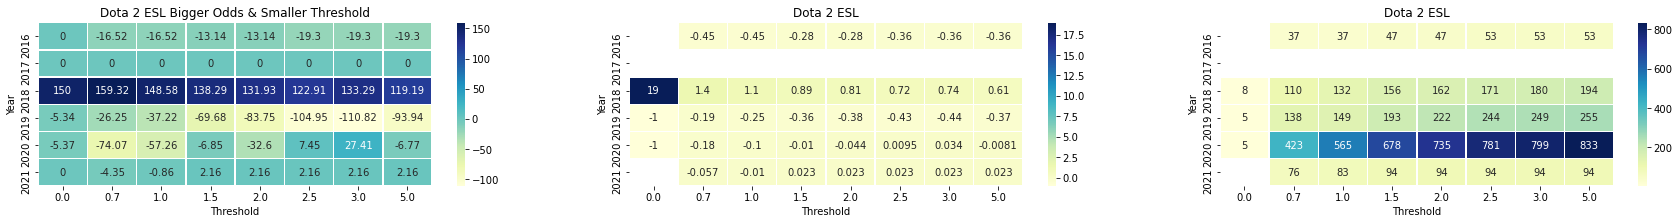

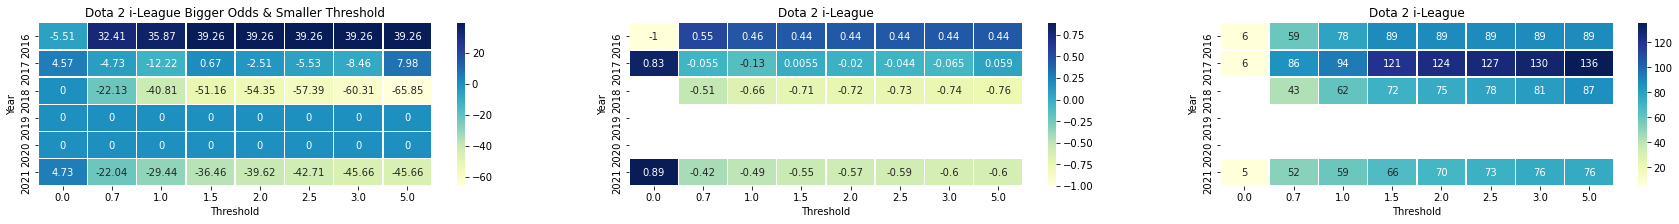

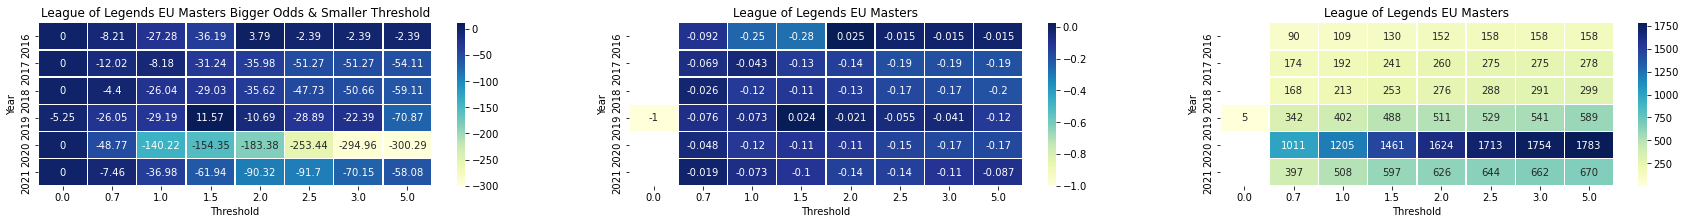

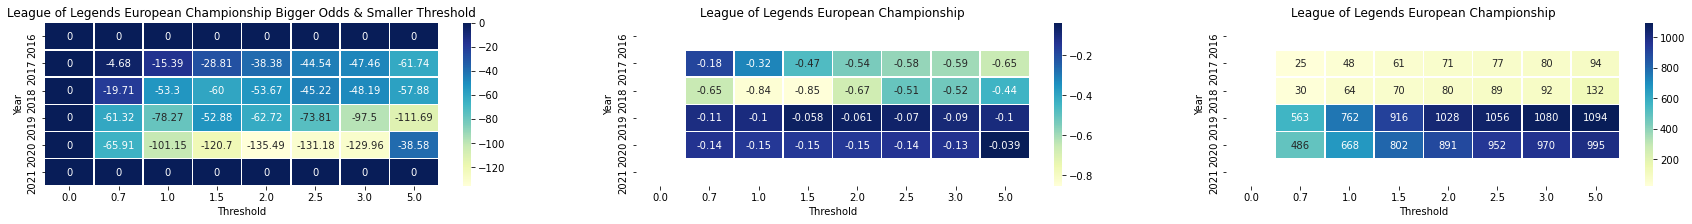

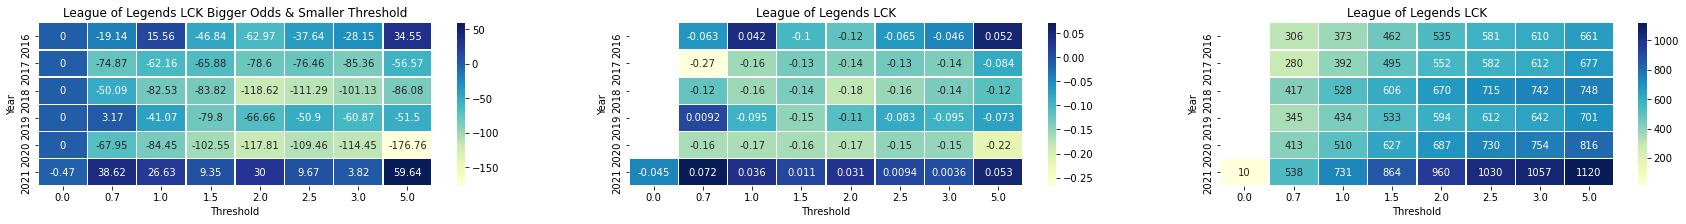

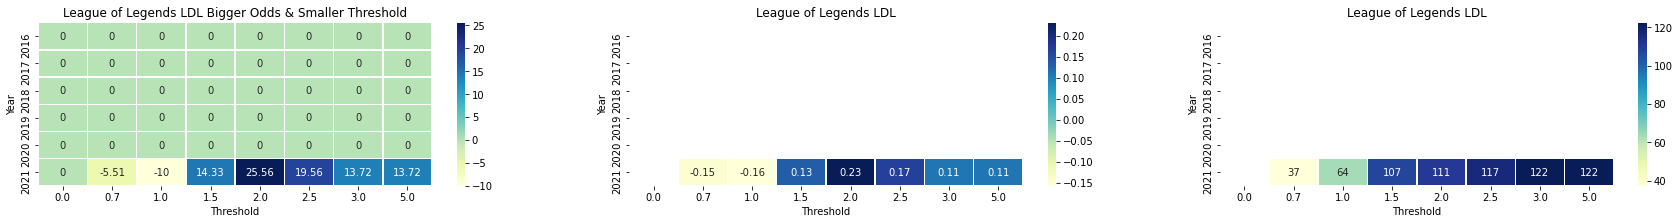

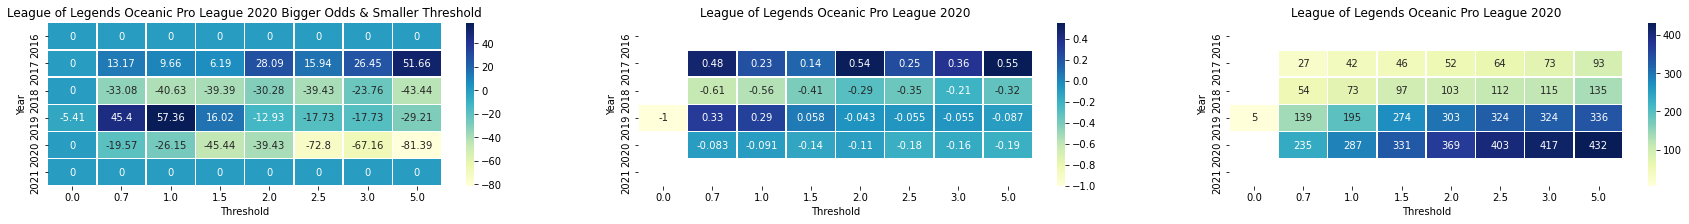

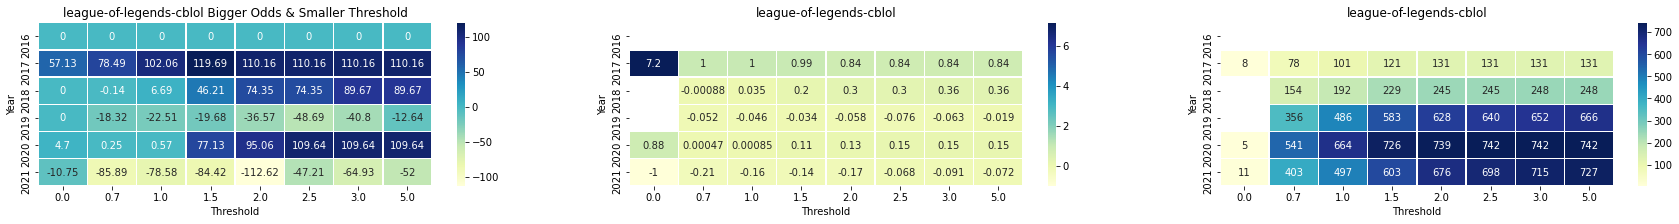

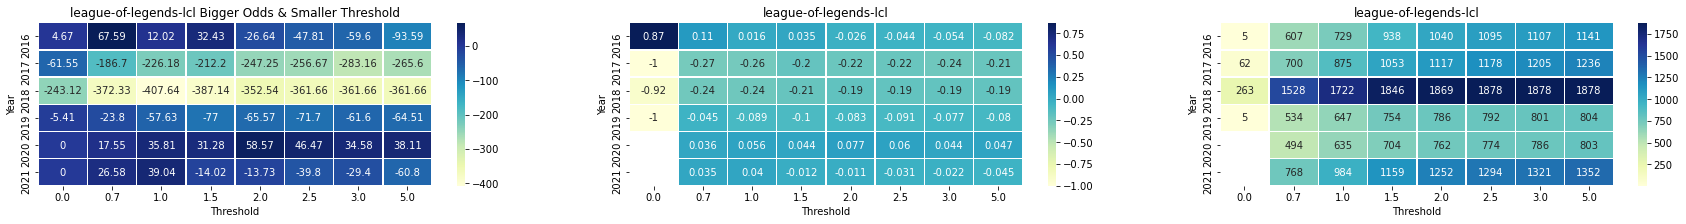

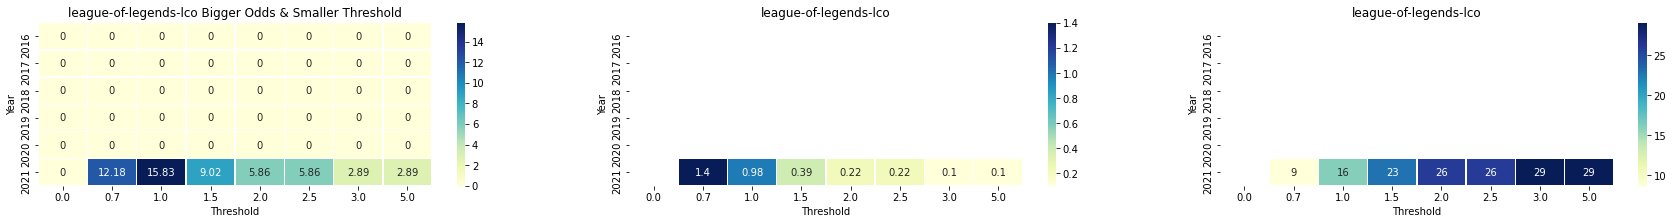

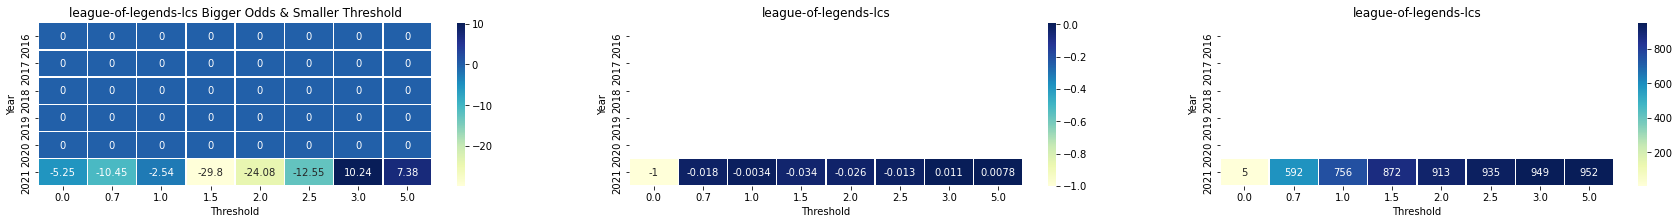

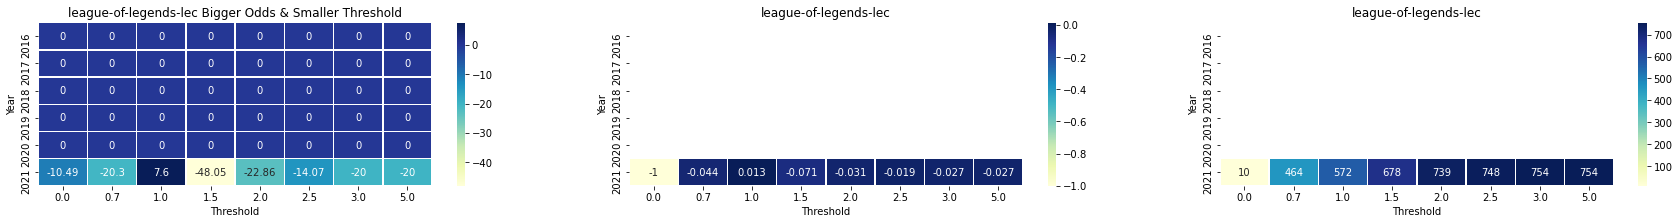

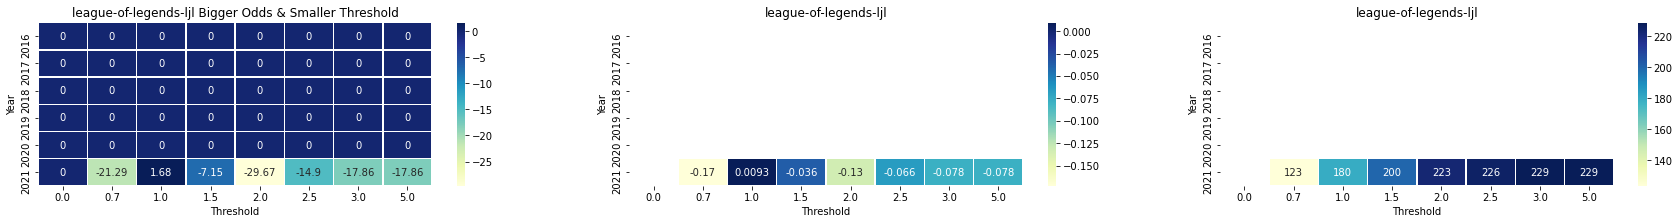

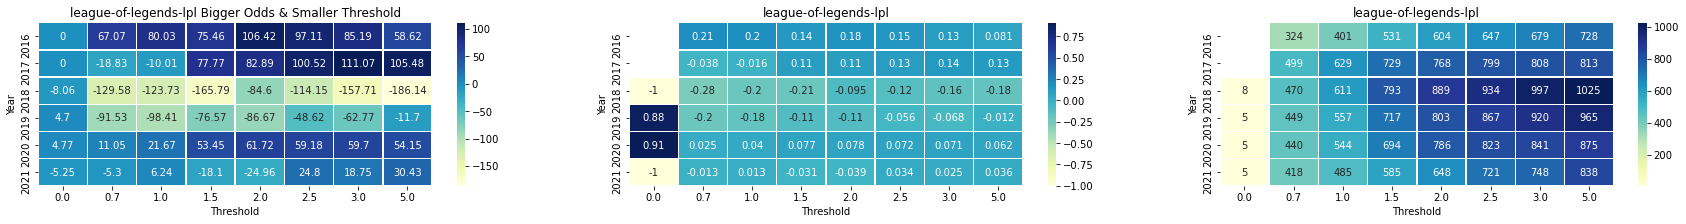

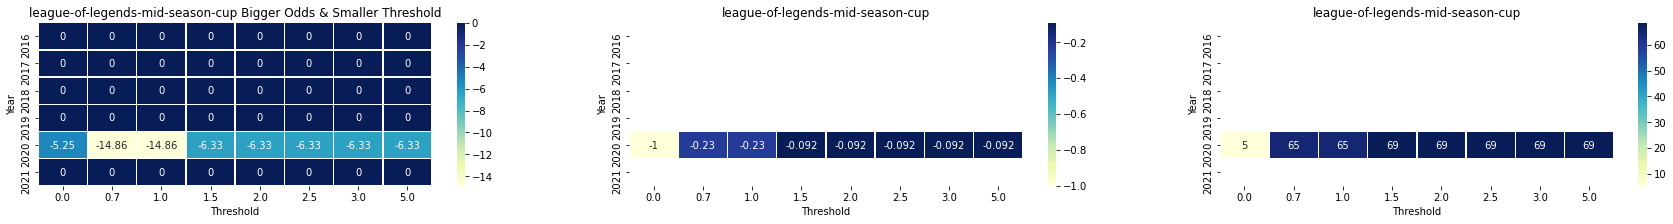

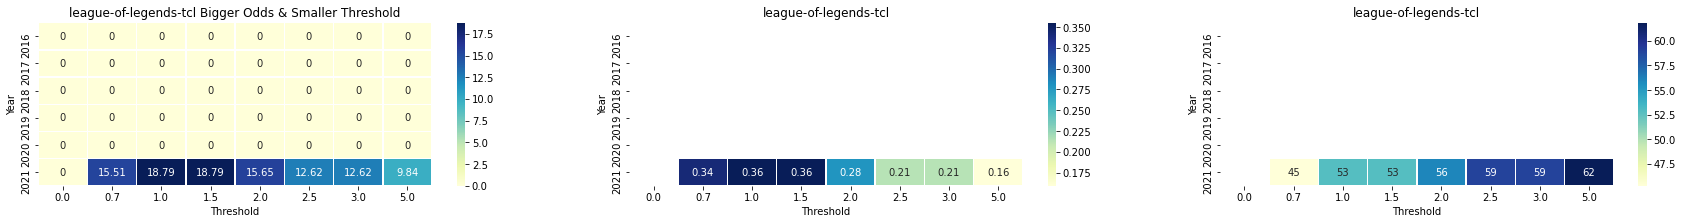

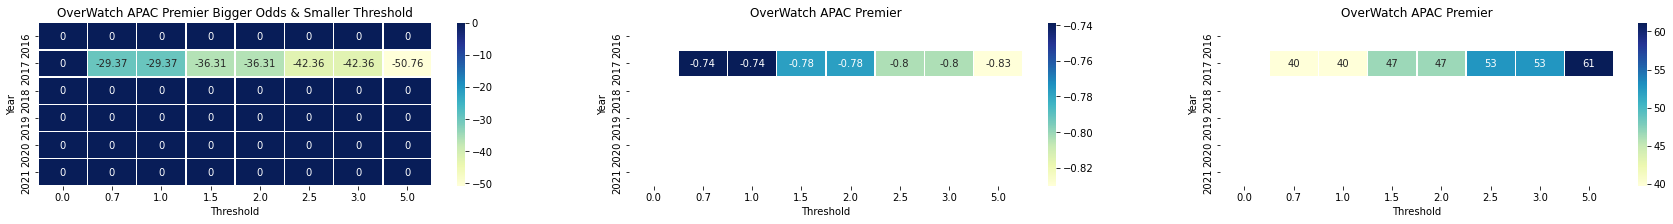

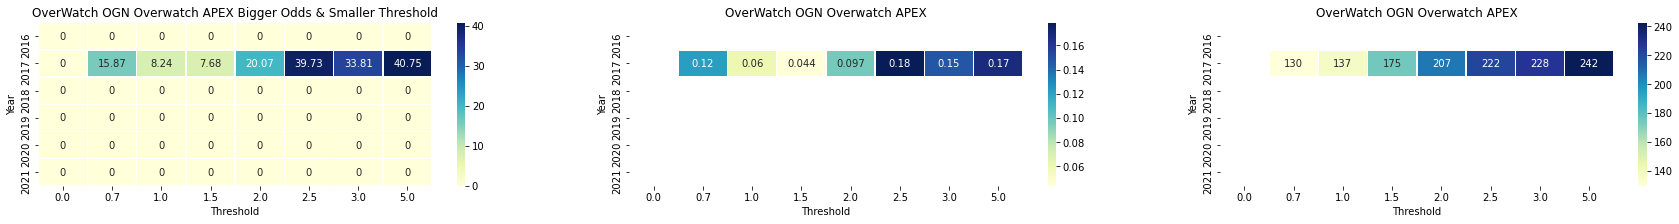

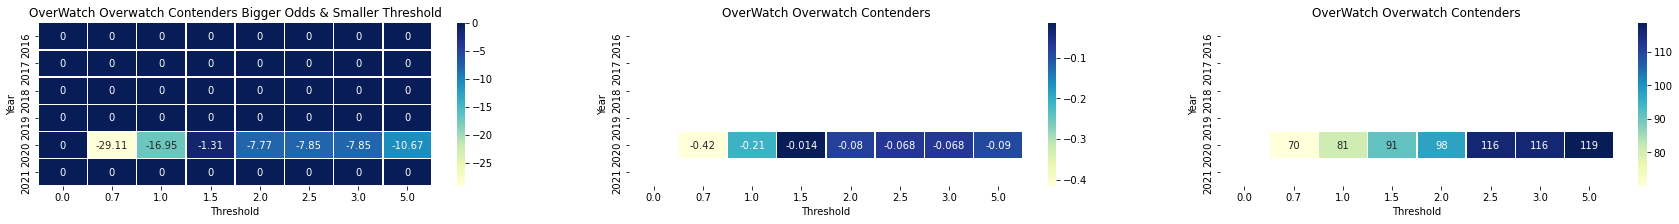

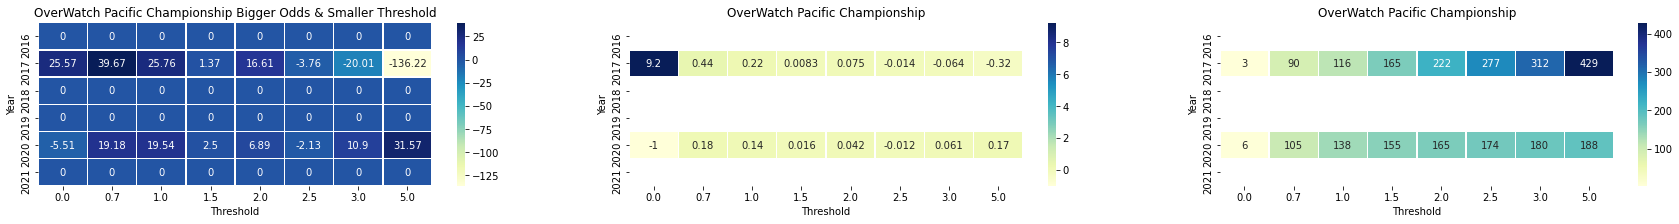

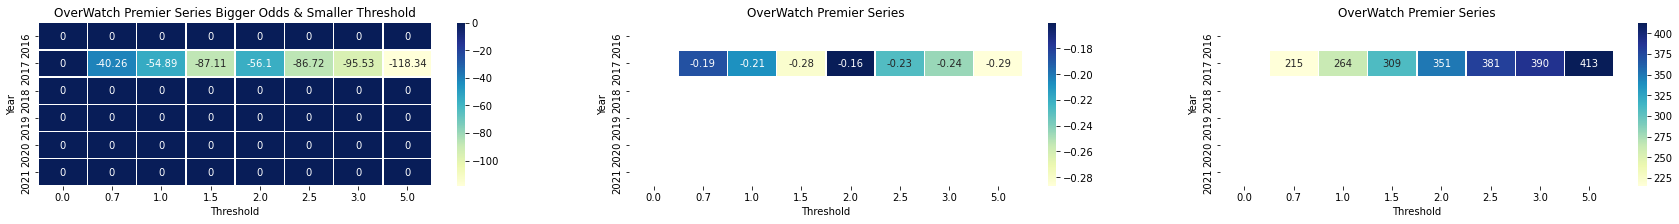

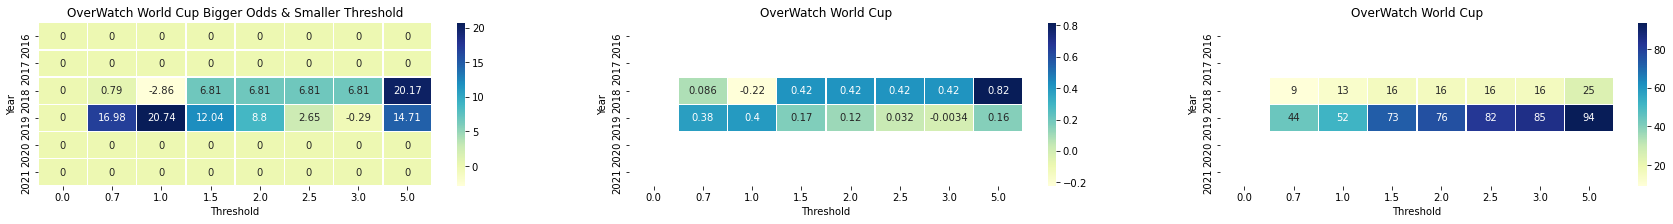

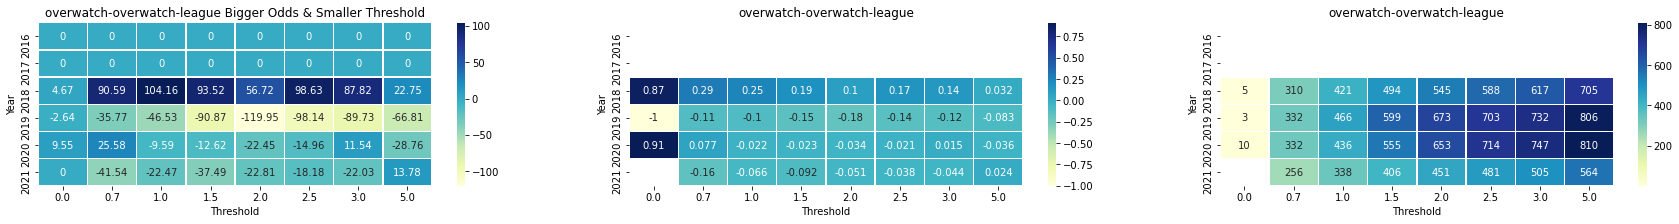

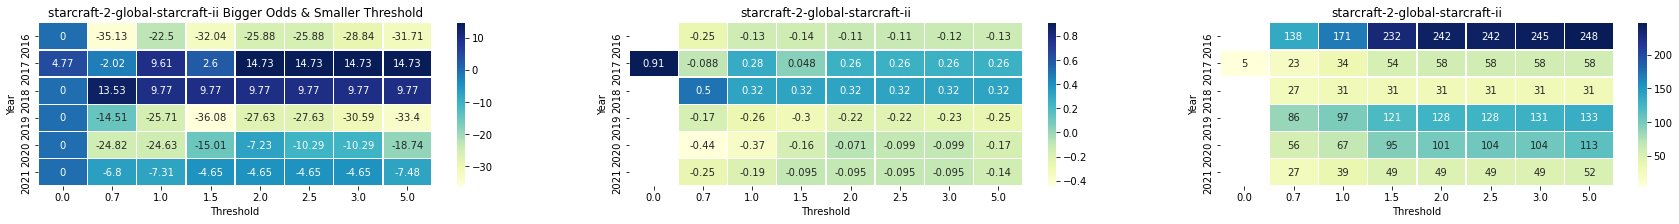

In [164]:
#BiggerOdds & Smaller than threshold:
i = 0
plt.rcParams["figure.figsize"] = (30,3)

for league in leagues:
    df_results = pd.DataFrame(columns=["Year", "Div", "Threshold", "ProfitOnBig", "Profit_pct", "Profit_cnt"])
    i += 1
    for years in range(2016, 2022):
        div = (df["Div"] == league)
        year = (df["Year"] == years)
        i += 1
        for threshold in thresholds:
            std_range = (df["STD"] <= threshold)
            df_filtered = df[year & div & std_range]
            profit = df_filtered["ProfitOnBig"].sum()
            profit_pct = df_filtered["ProfitOnBig"].sum() / df_filtered["StakeBig"].sum()
            profit_cnt = df_filtered["ProfitOnBig"].sum() / profit_pct
            new_row = pd.Series({"Year":years, "Div":league, "Threshold":threshold, "Profit":round(profit,2), "Profit_pct":profit_pct, "Profit_cnt":profit_cnt})
            df_results = df_results.append(new_row, ignore_index=True)
            i += 1
    fig, ax = plt.subplots(1,3)
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit"), cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5, ax=ax[0]).set(title=str(league) + " Bigger Odds & Smaller Threshold")
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit_pct"), cmap="YlGnBu", annot=True, linewidths=0.5, ax=ax[1]).set(title=league)
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit_cnt"), cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, ax=ax[2]).set(title=league)
    fig.show()

### Filter by Game & | Date

In [111]:
df = df[df["Div"].str.contains("league-of-legends")]

In [ ]:
df = df[df['Date'] > "2021-04-01"]

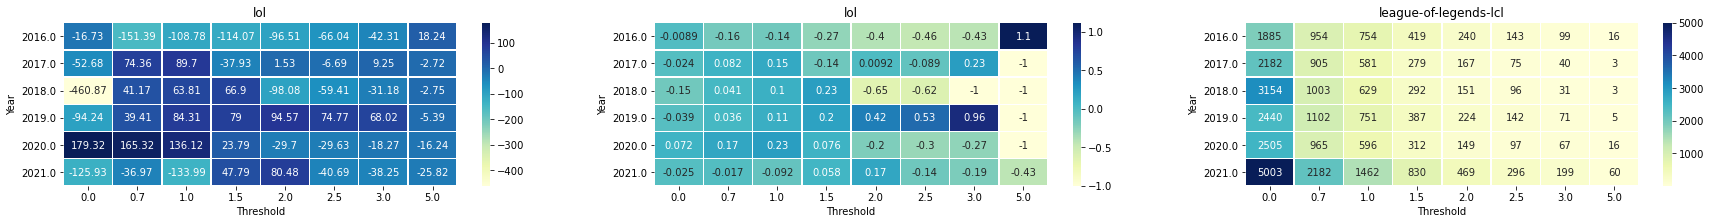

In [118]:
#BiggerOdds & Bigger than threshold for all LOL matches:

i = 0
plt.rcParams["figure.figsize"] = (30,3)

for _ in [_]:
    df_results = pd.DataFrame(columns=["Date", "Threshold", "ProfitOnBig", "Profit_pct", "Profit_cnt"])
    i += 1
    for years in range(2016, 2022):
        year = (df["Year"] == years)
        i += 1
        for threshold in thresholds:
            std_range = (df["STD"] >= threshold)
            df_filtered = df[year & std_range]
            profit = df_filtered["ProfitOnBig"].sum()
            profit_pct = df_filtered["ProfitOnBig"].sum() / df_filtered["StakeBig"].sum()
            profit_cnt = df_filtered["ProfitOnBig"].sum() / profit_pct
            new_row = pd.Series({"Year":years, "Threshold":threshold, "Profit":round(profit,2), "Profit_pct":profit_pct, "Profit_cnt":profit_cnt})
            df_results = df_results.append(new_row, ignore_index=True)
            i += 1
    fig, ax = plt.subplots(1,3)
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit"), cmap="YlGnBu", annot=True, fmt="g", linewidths=0.5, ax=ax[0]).set(title="lol")
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit_pct"), cmap="YlGnBu", annot=True, linewidths=0.5, ax=ax[1]).set(title="lol")
    sns.heatmap(df_results.pivot("Year", "Threshold", "Profit_cnt"), cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, ax=ax[2]).set(title=league)
    fig.show()
    